# Lab 7: CART

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This lab will investigate **CART** applications with a dataset of `Loans.csv`. We will use publicly available data from `LendingClub.com` that the data covers the 9,578 loans funded by the platform between May 2007 and February 2010.

Two critical questions in the investment industry do show up as follows:
1) What risks does the borrower have?
2) Given the borrower’s risk, does it make sense to invest him/her?

The answer to the first question determines the interest rate the borrower would have. Interest rate measures the risk level of the borrower, i.e. the riskier the borrower, the higher the interest rate. Hence, the eligibility of the borrower can be determined regarding the interest rate.

Investors (lenders) provide loans to borrowers in exchange for the promise of repayment with interest. That means the investors only makes profit if the borrower pays off the loan. However, if he/she doesn’t repay the loan, then the investor loses money.
The interest rate is provided to us for each borrower. We’ll address the second question indirectly by trying to predict if the borrower will repay the loan by its mature date or not.


In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Loans.csv")
df.head(10)

,CreditPolicy,Purpose,IntRate,Installment,LogAnnualInc,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,NotFullyPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


**Features in the dataset:**

- **CreditPolicy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **Purpose:** The purpose of the loan such as: credit_card, debt_consolidation, etc.
- **IntRate:** The interest rate of the loan (proportion).
- **Installment:** The monthly installments \($\) owed by the borrower if the loan is funded.
- **LogAnnualInc:** The natural log of the annual income of the borrower.
- **Dti:** The debt-to-income ratio of the borrower.
- **Fico:** The FICO credit score of the borrower.
- **DaysWithCrLine:** The number of days the borrower has had a credit line.
- **RevolBal:** The borrower’s revolving balance.
- **RevolUtil:** The borrower’s revolving line utilization rate.
- **InqLast6mths:** The borrower’s number of inquiries by creditors in the last 6 months.
- **Delinq2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **PubRec:** The borrower’s number of derogatory public records.

**Target variable:**

- **NotFullyPaid:** indicates whether the loan was not paid back in full (the borrower either defaulted or the borrower was deemed unlikely to pay it back).

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditPolicy    9578 non-null   int64  
 1   Purpose         9578 non-null   object 
 2   IntRate         9578 non-null   float64
 3   Installment     9578 non-null   float64
 4   LogAnnualInc    9578 non-null   float64
 5   Dti             9578 non-null   float64
 6   Fico            9578 non-null   int64  
 7   DaysWithCrLine  9578 non-null   float64
 8   RevolBal        9578 non-null   int64  
 9   RevolUtil       9578 non-null   float64
 10  InqLast6mths    9578 non-null   int64  
 11  Delinq2yrs      9578 non-null   int64  
 12  PubRec          9578 non-null   int64  
 13  NotFullyPaid    9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


> Draw a plot showing the breakdown of NotFullyPaid column in terms of positive and negative responses

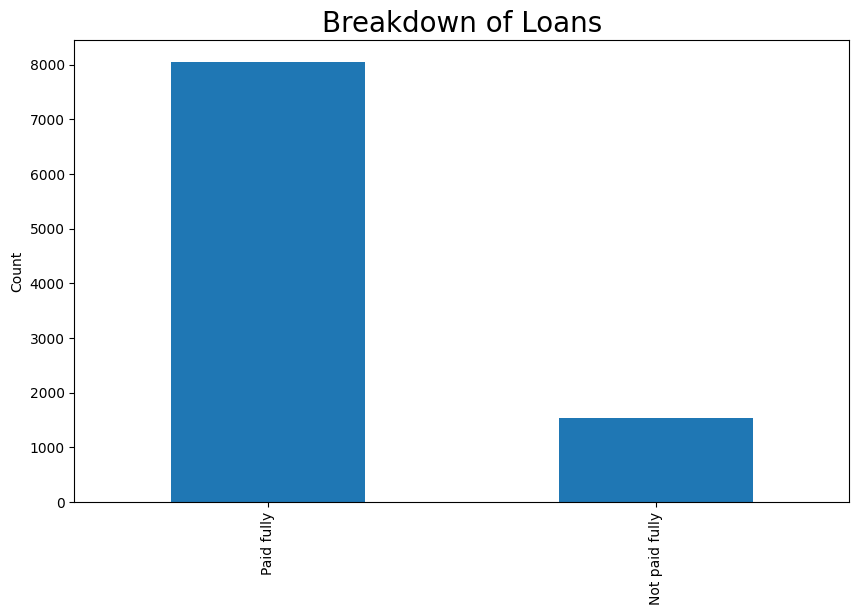

In [ ]:
# Write the code here
# ----------------------------------------------

# Get the numbers and breakdown of positive and negative Examples
sum_notfullypaid = df.groupby(['NotFullyPaid'])['NotFullyPaid'].count()


# Plot the options
plt.figure(figsize=(10,6))
sum_notfullypaid.plot(kind='bar')

# ----------------------------------------------

plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Breakdown of Loans", y=1, fontdict={"fontsize": 20});

> Create dummy variables for the column which is an object in the dataset. You can use `pd.get_dummies` function for both to select the column and to drop it off the dataset

In [ ]:
# Write the code here
# ----------------------------------------------
object_cols = df.select_dtypes(include='object').columns
purpose_dummies = pd.get_dummies(df['Purpose'])

df = pd.concat([df, purpose_dummies], axis='columns')
df = df.drop('Purpose', axis=1)
df.head()
# ----------------------------------------------

KeyError: 'Purpose'

## Splitting data

> Split the dataset in to `Train` and `Test`

In [ ]:
from sklearn.model_selection import train_test_split

# Write the code here
# ----------------------------------------------
y = df['NotFullyPaid']
X = df.drop('NotFullyPaid', axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# ----------------------------------------------


(6704, 19) (2874, 19) (6704,) (2874,)


## CART Model

Use the `DecisionTreeClassifier` function within `sklearn.tree`  to fit a CART model to the training set. There are several parameters that you can tune to prevent over fitting and to get better model accuracy. One parameter you can set is *max_depth*, which controls the maximum number of levels in your trained model. In the example below we set the *max_depth* to five and visualize the resulting tree.  


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#Build the decision tree

dtc_clf = DecisionTreeClassifier (criterion = "entropy",              # Create the object
                                  max_depth=5, random_state=7 )
dtc_clf.fit(X_train, y_train)                                         # Fit the model
y_pred = dtc_clf.predict(X_test)                                      # Predict the new target values from unseen data
y_pred


array([0, 0, 0, ..., 0, 0, 0])

You can see the accuracy score of the result with `confusion matrix`

Accuracy score of the Decision Tree: 0.8357689631176062
Decision Tree Classification:
[[2401    7]
 [ 465    1]]


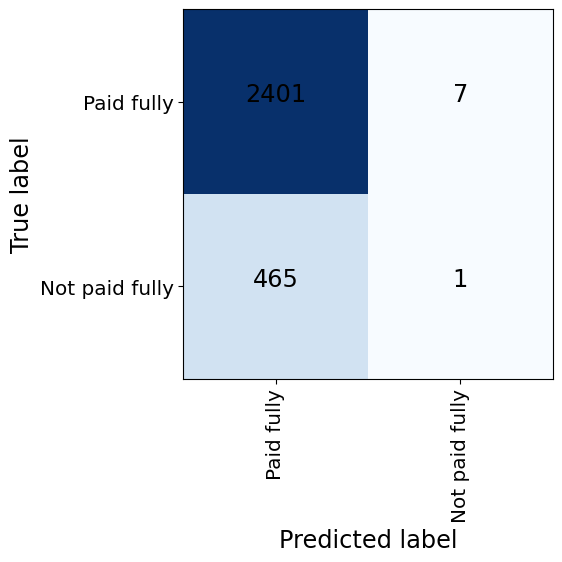

In [ ]:
from sklearn.metrics import confusion_matrix

cMatrix = confusion_matrix(y_test, y_pred)

print("Accuracy score of the Decision Tree:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification:")
print(cMatrix)


# Visualizing the confusion matrix

plt.imshow(cMatrix, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['Paid fully', 'Not paid fully']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

> Create various decision trees with different hyperparameters. You can use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to be inspired by different parameter styles.


Accuracy score of the Decision Tree: 0.826026443980515
Decision Tree Classification:
[[2344   64]
 [ 436   30]]


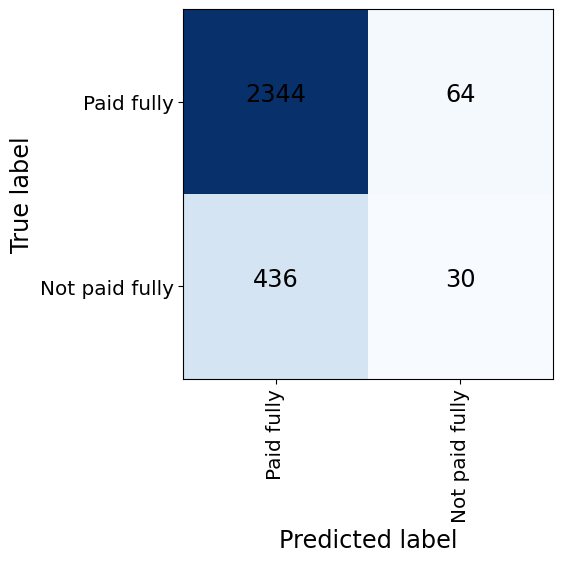

In [ ]:
# Write the code here
# ----------------------------------------------
# Build your CART Model
dtc_clf_2 = DecisionTreeClassifier (criterion = "gini",              # Create the object
                                  max_depth=7, random_state=7 )
dtc_clf_2.fit(X_train, y_train)                                          # Fit the model
y_pred_2 = dtc_clf_2.predict(X_test)                                      # Predict the new target values from unseen data

#Build the confusion matrix
cMatrix_2 = confusion_matrix(y_test, y_pred_2)

print("Accuracy score of the Decision Tree:", accuracy_score(y_test, y_pred_2))
print("Decision Tree Classification:")
print(cMatrix_2)


# Visualizing the confusion matrix

plt.imshow(cMatrix_2, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix_2[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix_2[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix_2[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix_2[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['Paid fully', 'Not paid fully']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()




# ----------------------------------------------

Let's see the `roc curve` graph for both train and test dataset

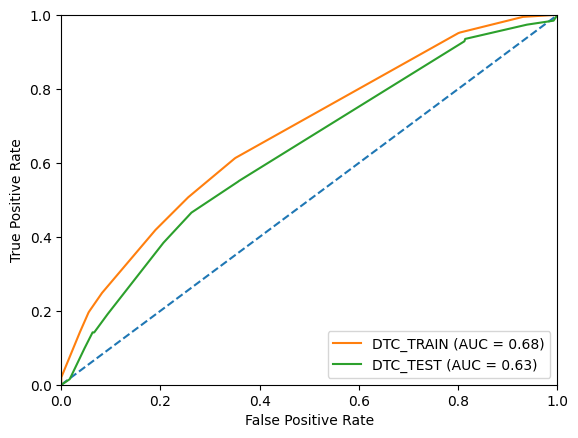

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

dtc_clfpreds_train = dtc_clf.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, dtc_clfpreds_train)
roc_auc_dtc_train= roc_auc_score(y_train, dtc_clfpreds_train)

dtc_clfpreds_test = dtc_clf.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, dtc_clfpreds_test)
roc_auc_dtc_test= roc_auc_score(y_test, dtc_clfpreds_test)

#Plot the ROC curves

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='DTC_TRAIN (AUC = %0.2f)' % roc_auc_dtc_train)
plt.plot(fpr2, tpr2, label='DTC_TEST (AUC = %0.2f)' % roc_auc_dtc_test)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

#fig.savefig('ROCcomparison.pdf', bbox_inches='tight')

> To have a decision tree structure:
1. Install `GraphViz`
2. Get the path for gvedit.exe
3. Add this path to the computer's PATH
4. One way to get to environment settings to set your path is to click on each of these button/menu options: start->computer->system properties->advanced settings->environment variables
5. Click Edit User path
6. Add this string to the end of your Variable value list (including semicolon): **";C:\Program Files (x86)\Graphviz2.34\bin"**
7. Click OK
8. Restart your Python IDE


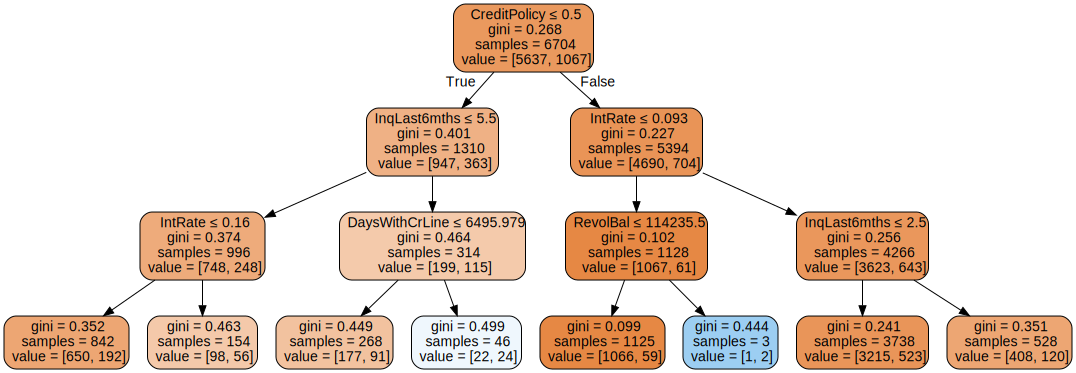

In [ ]:
from sklearn import tree

# Write the code here
# ---------------------------------------
# Create tree model and fit X and y with criterion: 'gini' and max_depth = '3'
dtc_clf = DecisionTreeClassifier (criterion = "gini",              # Create the object
                                  max_depth=3, random_state=7 )
dtc_clf.fit(X_train, y_train)                                         # Fit the model
y_pred = dtc_clf.predict(X_test)                                      # Predict the new target values from unseen data
y_pred


# ---------------------------------------

feature_names = list(df.loc[:, df.columns != "NotFullyPaid"])
target_names = list(df.loc[:, df.columns == "NotFullyPaid"])


import graphviz
dot_data = tree.export_graphviz(dtc_clf, out_file=None,
                      feature_names=feature_names,
                      #class_names=target_names,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('DTgraph')
graph


#fig.savefig('Decision Tree', bbox_inches='tight')

Based on the tree, answer the following questions:

> How many nodes are in the tree? You can count on the image, or use the method `tree_.node_count_` on your model.

In [ ]:
# Write the code here
#------------------------------
n_nodes = dtc_clf.tree_.node_count
n_nodes
#------------------------------

15

> Which feature variable is split at the root node?

In [ ]:
# Write the answer here
#------------------------------
# Access the tree structure
tree = dtc_clf.tree_
feature_index = tree.feature[0]
root_feature_name = feature_names[feature_index]

print("Root Feature Name is", root_feature_name)
#------------------------------

Root Feature Name is CreditPolicy


> Which of the feature variables are important? You can use `tree.feature_importances_` Check the [link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

Index(['CreditPolicy', 'IntRate', 'InqLast6mths', 'DaysWithCrLine', 'RevolBal',
       'debt_consolidation', 'credit_card', 'all_other', 'NotFullyPaid',
       'PubRec', 'Delinq2yrs', 'home_improvement', 'RevolUtil', 'Fico', 'Dti',
       'LogAnnualInc', 'Installment', 'educational', 'major_purchase'],
      dtype='object')

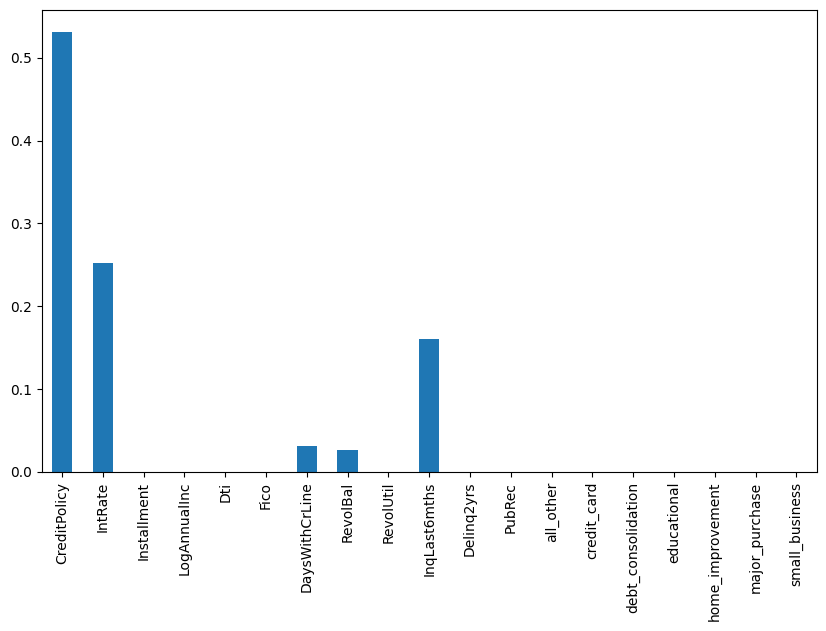

In [ ]:
# Write the code here.
# ----------------------------------------
importances = dtc_clf.feature_importances_
importanceDT = pd.Series(importances, index=feature_names)
plt.figure(figsize=(10,6))
importanceDT.plot(kind='bar')

# ----------------------------------------

# Having the features in descending order
featureDT = df.columns[np.argsort(importanceDT)][::-1]
featureDT

> Constrain the _maximum depth_ to 10. What is the new % of correct predictions on the training and testing set? Do you think this model has overfit the data?

In [ ]:
# Write the code here.
# ------------------------------------------------

# Build the NEW decision tree with "max_depth" 10
dtc_clfNEW = DecisionTreeClassifier (criterion = "gini",              # Create the object
                                  max_depth=10, random_state=7 )


# Fit the new model
dtc_clfNEW.fit(X_train, y_train)                                         # Fit the model
# ------------------------------------------------

dtc_clfNEW_Train = np.mean((dtc_clfNEW.predict(X_train) == y_train))

# ------------------------------------------------
# Write the similar equation like above for TEST data
dtc_clfNEW_Test = np.mean((dtc_clfNEW.predict(X_test) == y_test))

# -------------------------------------------------
print('The accuracy on the: \n\t training data is {}'.format(round(dtc_clfNEW_Train,3)))
print('\t testing data is {}'.format(round(dtc_clfNEW_Test,3)))



The accuracy on the: 
	 training data is 0.883
	 testing data is 0.817


The accuracy drop from 88% on training data to 82% on testing data indicates potential overfitting.

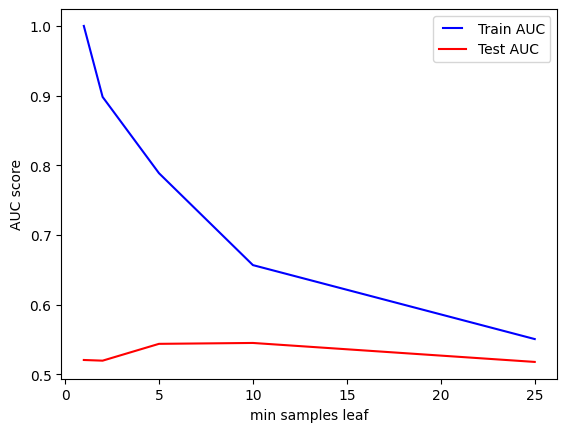

In [ ]:
min_samples_leafs =  [1,2,5,10,25]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

You'll see a graph of AUC on the training and test set as a function of *max_depths*. Discuss about overfitting on this graph.

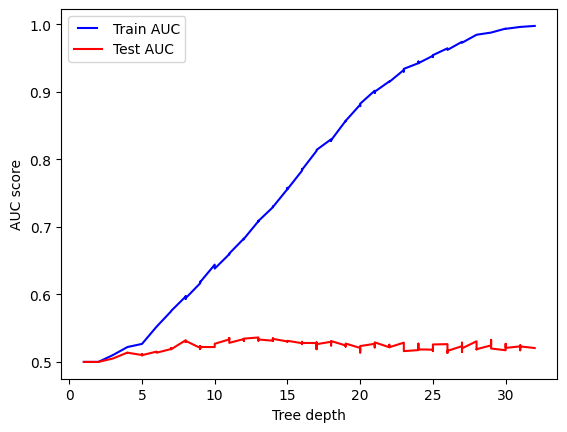

In [ ]:
max_depths = np.linspace(1, 32, 132, endpoint=True, dtype=int)

train_results = []
test_results = []

for max_depth in max_depths:
    dt1 = DecisionTreeClassifier(max_depth=max_depth)
    dt1.fit(X_train, y_train)
    train_pred = dt1.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt1.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

   # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The chart suggests overfitting. While training accuracy rises sharply with increasing max depth, test accuracy shows minimal improvement and plateaus.

# LOGISTICS & KNN

## Logistics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale X
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6704, 19) (2874, 19) (6704,) (2874,)


In [ ]:

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 10)
}
logreg = LogisticRegression(max_iter=10000, solver='liblinear')
logreg_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = 10, scoring='accuracy')
logreg_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.3593813663804626, 'penalty': 'l2'}
accuracy : 0.8409907244700492


Accuracy score of the Logistics Regression: 0.8382045929018789
Logistics Regression Classification:
[[2402    6]
 [ 459    7]]


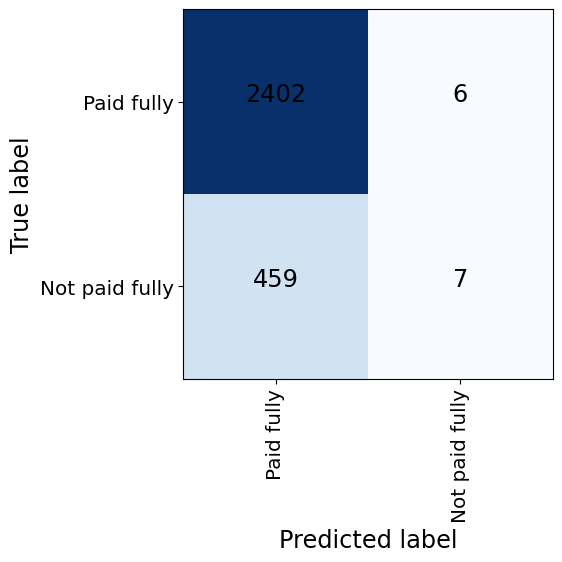

In [ ]:
# Define the logistic model with tuned hyperparameters
lr_tuned = LogisticRegression(C=0.3593813663804626, penalty='l2',  solver='liblinear', max_iter=10000)
model_tuned = lr_tuned.fit(X_train, y_train)
y_tuned_pred = lr_tuned.predict(X_test)

cMatrix_lr = confusion_matrix(y_test, y_tuned_pred)

print("Accuracy score of the Logistics Regression:", accuracy_score(y_test, y_tuned_pred))
print("Logistics Regression Classification:")
print(cMatrix_lr)

# Visualizing the confusion matrix

plt.imshow(cMatrix_lr, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix_lr[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix_lr[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix_lr[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix_lr[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['Paid fully', 'Not paid fully']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Select your n_neighbors parameters------------------------
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

#---------------------------------------------------------

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(X_train, y_train)

print(knn_model.best_params_)
print(knn_model.best_score_)
print(pd.DataFrame(knn_model.cv_results_))

{'n_neighbors': 10}
0.8393496722205528
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004619      0.002911         0.109272        0.064147   
1       0.004807      0.003913         0.113052        0.024027   
2       0.004153      0.001614         0.111266        0.023142   
3       0.007633      0.003816         0.104759        0.029348   
4       0.003666      0.001822         0.124675        0.003596   
5       0.004234      0.001646         0.113748        0.017855   
6       0.005372      0.003262         0.135168        0.017597   
7       0.005515      0.003350         0.137696        0.017043   
8       0.006318      0.004152         0.127002        0.047402   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.824012   
1                 3   {'n_neighbors': 3}           0.804623   
2                 4   {'n_neighbors': 4}           0.832215   
3                 5   {'n_neighbors': 

Accuracy score of the KNN: 0.8357689631176062
KNN Classification:
[[2393   15]
 [ 457    9]]


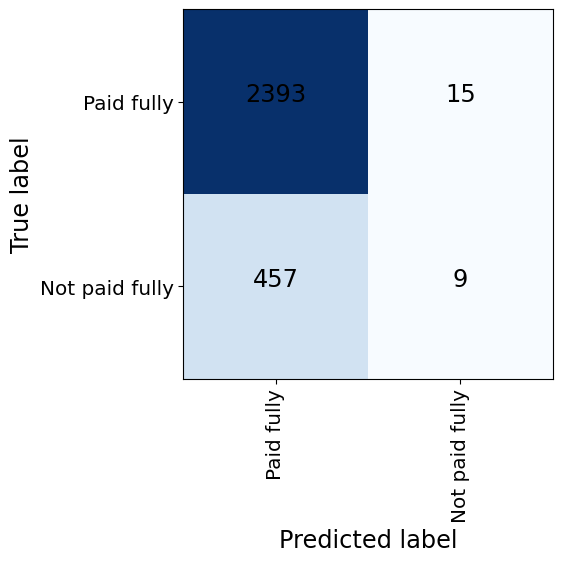

In [ ]:
# Fit model with best params
#create and fit the model-------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train, y_train)

#predict via the model ---------------------------------------------------------
y_tuned_knn = knn.predict(X_test)

cMatrix_knn = confusion_matrix(y_test, y_tuned_knn)

print("Accuracy score of the KNN:", accuracy_score(y_test, y_tuned_knn))
print("KNN Classification:")
print(cMatrix_knn)

# Visualizing the confusion matrix

plt.imshow(cMatrix_knn, cmap=plt.cm.Blues)
plt.text(0, 0, '{}'.format(cMatrix_knn[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix_knn[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix_knn[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix_knn[1, 1]), horizontalalignment='center',fontsize = 'xx-large')
tick_marks = [0,1]
labels = ['Paid fully', 'Not paid fully']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.yticks(tick_marks, labels,fontsize = 'x-large')
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()

I evaluated four models to minimize the number of falsely classified instances where the loan was not fully paid but predicted as fully paid (false negatives). Here's a summary:

    1. Decision Tree (max_depth=5, entropy): Accuracy: 0.836, False Negatives: 454
    2. Decision Tree (max_depth=7, gini): Accuracy: 0.833, False Negatives: 453 (Preferred Model)
    3. Logistic Regression (C=0.359, L2, liblinear solver): Accuracy: 0.833, False Negatives: 473
    4. KNN (n_neighbors=10): Accuracy: 0.832, False Negatives: 462
    
Based on the results, the Decision Tree with max_depth=7 and gini impurity achieved the lowest number of false negatives (453) with a comparable accuracy (0.833). This model seems promising and is a good candidate for further improvements.